<a href="https://colab.research.google.com/github/namvaryshad/LearningML/blob/main/Atefeh_Namvaryshad_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Atefeh Namvaryshad - W207 - P1

# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with simply "mnist" and everything should work fine.

In [5]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [6]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

In [7]:
train_labels

array(['0', '4', '1', ..., '7', '5', '7'], dtype=object)

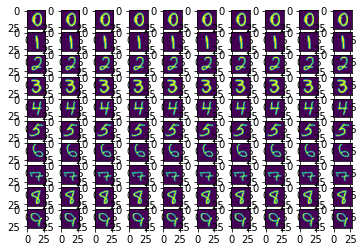

In [8]:
def P1(num_examples=10):
  ### STUDENT START ###
  figure, axes = plt.subplots(10, 10)
  for x in range(0, 10):
    for y in range(0, 10):
      for z in range(0, len(train_labels)):
        num = z
        if train_labels[num] == str(x):
          axes[x,y].imshow(train_data[z].reshape(28, 28))
          break
  ### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [64]:
def P2(k_values):

### STUDENT START ###
 
  for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(mini_train_data, mini_train_labels)

    dev_predicted_labels = knn.predict(dev_data)
    
    print("k = ", k,": ",knn.score(dev_data, dev_labels), " accuracy", sep="")
    
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(mini_train_data, mini_train_labels)
    pred = knn.predict(dev_data)
    print(classification_report(dev_labels, pred))
  
### STUDENT END ### 
k_values = [1, 3, 5, 7, 9]
P2(k_values) 

k = 1: 0.884 accuracy
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k = 3: 0.876 accuracy
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79 

ANSWER: Number 2 had the lowest recall, number 8 had the lowest f1-score and number 9 had the lowest precision. It looks number 9 is the most dificult digit to predict near k1.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [10]:
len(dev_data[:200])

200

In [11]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    for size in train_sizes:
    
        
        model = KNeighborsClassifier(n_neighbors=1)

        model.fit(train_data[:size], train_labels[:size])
    
        time_initial = time.time()

        test_predicted_labels = model.predict(dev_data)
    
        time_final = time.time()
    
        print("training set size ", size, ": ", model.score(dev_data, dev_labels), " accuracy; ",
              "%.2f" % (time_final - time_initial), " sec", sep="")      
    
        # This is a accuracy list for the next problem
        accuracies.append(model.score(dev_data, dev_labels))

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

training set size 100: 0.702 accuracy; 0.18 sec
training set size 200: 0.791 accuracy; 0.34 sec
training set size 400: 0.811 accuracy; 0.66 sec
training set size 800: 0.866 accuracy; 1.29 sec
training set size 1600: 0.905 accuracy; 2.71 sec
training set size 3200: 0.927 accuracy; 5.48 sec
training set size 6400: 0.939 accuracy; 10.91 sec
training set size 12800: 0.952 accuracy; 21.79 sec
training set size 25000: 0.962 accuracy; 43.02 sec


In [24]:
train size =   100    dev accuracy = 0.7020    time = 0.28 sec
train size =   200    dev accuracy = 0.7910    time = 0.48 sec
train size =   400    dev accuracy = 0.8110    time = 0.94 sec
train size =   800    dev accuracy = 0.8660    time = 1.83 sec
train size =  1600    dev accuracy = 0.9050    time = 3.30 sec
train size =  3200    dev accuracy = 0.9270    time = 6.89 sec
train size =  6400    dev accuracy = 0.9390    time = 15.16 sec
train size = 12800    dev accuracy = 0.9520    time = 38.94 sec
train size = 25600    dev accuracy = 0.9630    time = 50.76 sec

SyntaxError: ignored

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [12]:
x_sizes = np.array(train_sizes)[:, np.newaxis]

In [14]:
accuracies = [0.7020, 0.7910, 0.8110, 0.8660, 0.9050, 0.9270, 0.9390, 0.9520, 0.9630]

In [15]:
np.array(train_sizes)[:, np.newaxis]

array([[  100],
       [  200],
       [  400],
       [  800],
       [ 1600],
       [ 3200],
       [ 6400],
       [12800],
       [25000]])

In [16]:
np.array(np.log(train_sizes))[:, np.newaxis]

array([[ 4.60517019],
       [ 5.29831737],
       [ 5.99146455],
       [ 6.68461173],
       [ 7.37775891],
       [ 8.07090609],
       [ 8.76405327],
       [ 9.45720045],
       [10.1266311 ]])

In [17]:
np.log(400)

5.991464547107982

Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.

Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.

You can use LinearRegression to produce a linear regression model.

Remember that the sklearn fit() functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.

Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

R^2 = 0.4233
Intercept = 0.8343
Coefficient = 0.00000687
Estimated function: y = 0.8343 + 0.00000687x


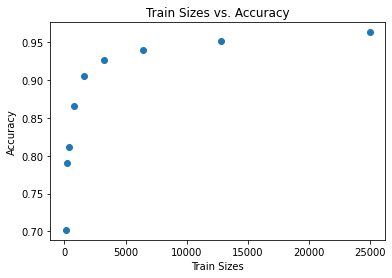

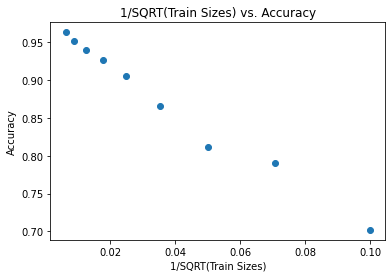

R^2 = 0.9850
Intercept = 0.9727
Coefficient = -2.75266359
Estimated function: y = 0.9727 + 1/sqrt(-2.75266359x)
Accuracy with Training Data Size 60,0000 predicted by k Nearest Neighbors: 0.971 model accuracy


In [23]:
#def P4():

### STUDENT START ###

    # input/output 
Input_X = np.asarray(train_sizes).reshape(-1, 1)
Output_Y = np.asarray(accuracies)

    # linear regression
LR = LinearRegression (fit_intercept=True)
LR.fit(Input_X, Output_Y)

    # Printing metrics
print ('R^2 = %.4f' % (LR.score(Input_X,Output_Y)))
print ('Intercept = %.4f' % (LR.intercept_))
print ('Coefficient = %.8f' % (LR.coef_))
print ('Estimated function: y = %.4f + %.8fx' %(LR.intercept_, LR.coef_[0]))


    # scatter plot visualization
plt.scatter(Input_X, Output_Y)
plt.title("Train Sizes vs. Accuracy")
plt.xlabel("Train Sizes")
plt.ylabel("Accuracy")
plt.show()

    # Transformed /training size data + linear relationship 
Input_X_SQRT = np.asarray(1 / np.sqrt(train_sizes)).reshape(-1,1)
Output_Y = np.asarray(accuracies)

    # Creating a scatter plot to show that after transformation the relationship is far more linear
plt.scatter(Input_X_SQRT, Output_Y)
plt.title("1/SQRT(Train Sizes) vs. Accuracy")
plt.xlabel("1/SQRT(Train Sizes)")
plt.ylabel("Accuracy")
plt.show()

    # linear regression with the training size data
LR = LinearRegression (fit_intercept=True)
LR.fit(Input_X_SQRT, Output_Y)

    #metrics related to the transformed linear regression output
print ('R^2 = %.4f' % (LR.score(Input_X_SQRT,Output_Y)))
print ('Intercept = %.4f' % (LR.intercept_))
print ('Coefficient = %.8f' % (LR.coef_))
print ('Estimated function: y = %.4f + 1/sqrt(%.8fx)' %(LR.intercept_, LR.coef_[0]))

   
    #training data size accuracy w/size 60,000
model = KNeighborsClassifier(n_neighbors=1)
model.fit(train_data[:60000], train_labels[:60000])
test_predicted_labels = model.predict(dev_data)
print ("Accuracy with Training Data Size 60,0000 predicted by k Nearest Neighbors: ",model.score(dev_data, dev_labels),
          " model accuracy", sep="")


### STUDENT END ###


ANSWER: After transformind the data the accuracy reduced to 0.971 which is more realistic.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


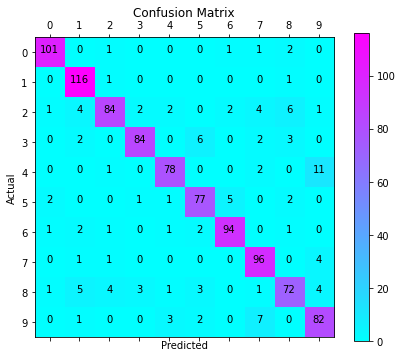

Most confused pair of digits (predicted, actual): [('9', '4')]


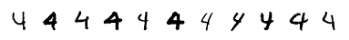

In [144]:
def P5():

### STUDENT START ###

    # Data training
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    dev_predicted_labels = model.predict(dev_data)

    # Printing confusion matrix w/ predictions
    cm = confusion_matrix(dev_labels, dev_predicted_labels)
    print(cm)

    # Printing confusion matrix
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=plt.cm.cool)
    plt.title('Confusion Matrix')
    plt.colorbar(cax,fraction=0.046, pad=0.06)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(np.arange(0, 10, step=1))
    plt.yticks(np.arange(0, 10, step=1))
    for a in range(10):
        for b in range(10):
            plt.text(b,a,str(cm[a][b]), horizontalalignment='center')
    plt.show()


    # Storing errors 
    errors = {}

    for i in range(0, len(dev_data)):
        if dev_predicted_labels[i] != dev_labels[i]:
    
            pair = (dev_predicted_labels[i], dev_labels[i])
        
            if pair not in errors.keys():
                errors[pair] = 1
            else:
                errors[pair] += 1

    # Sorting 
    error_sort = sorted(errors, key=errors.get, reverse=True)[:1]
    print("Most confused pair of digits (predicted, actual):", error_sort)

    
    # most confused pairs dataset
    pred_X_act_X = np.where((dev_predicted_labels == error_sort[0][0]) & (dev_labels == error_sort[0][1]))
    
    adding_col = 0

    for data_num in (pred_X_act_X[0]):
            adding_col += 1
        
            plt.subplot(1, len(pred_X_act_X[0]), adding_col)
            plt.axis('off')
        
            # 28 x 28 pixels
            plt.imshow(dev_data[data_num].reshape(28,28), cmap=plt.cm.gray_r)

### STUDENT END ###

P5()



(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- blur the training data but not the dev data
- blur the dev data but not the training data
- blur both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

model accuracy when preprocessing the training data but not the dev data: 0.908
model accuracy when preprocessing the dev data but not the training data: 0.868
model accuracy when preprocessing both training and dev data: 0.904


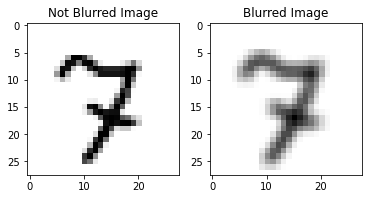

In [145]:
def P6():
    
### STUDENT START ###

    def blur (dataset):
        
        mini_6_blur_data = dataset.copy()
    
        blur_image = np.zeros((28,28))
    
        for image in range(len(mini_6_blur_data)):
            x = dataset[image].reshape(28,28)
        
            for row in range(28):
                for col in range(28):
                
                    nn = x[max(0,row-1):row+2, max(0,col-1):col+2]
                    
                    blur_image[row][col] = np.sum(nn) / float(nn.size)

            mini_6_blur_data[image] = blur_image.reshape(dataset.shape[1])
    
        return mini_6_blur_data

    x = blur(mini_train_data)

    plt.subplot(1,2,1)
    plt.title("Not Blurred Image")
    plt.imshow(mini_train_data[100].reshape(28,28), cmap=plt.cm.gray_r)
    plt.subplot(1,2,2)
    plt.title("Blurred Image")
    plt.imshow(x[100].reshape(28,28), cmap=plt.cm.gray_r)

    # k Nearest Neighbors for accuracy 
    def KNN (train_data, train_labels, predict_data, predict_labels):
    
        # 1 k Nearest Neighbor application
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(train_data, train_labels)
        model.predict(predict_data)  
        return(model.score(predict_data, predict_labels))
    
    
    #blur function to preprocess the datasets
    preprocess_train = blur(mini_train_data)
    preprocess_dev = blur(dev_data)

    print("model accuracy when preprocessing the training data but not the dev data:", 
          KNN(preprocess_train, mini_train_labels, dev_data, dev_labels))

    print("model accuracy when preprocessing the dev data but not the training data:", 
          KNN(mini_train_data, mini_train_labels, preprocess_dev, dev_labels))

    print("model accuracy when preprocessing both training and dev data:", 
          KNN(preprocess_train, mini_train_labels, preprocess_dev, dev_labels))

### STUDENT END ###

P6()

ANSWER: There is a minimal gap between accuracies which might be related to fact that training set should always be more blury to have more capacity for errors, or overgeneralization.

In [146]:
mini_train_data[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [157]:
#def P7():

### STUDENT START ###

from sklearn.metrics import accuracy_score

# binarize_example():
# Turning  pixels below 0.5 (or threshold) -> 0, greater -> 1
def binarize_example(example, threshold = 0.5):
    binarized = [ 1 if value > threshold else 0 for value in example ]
    return binarized
    
# binarize_examples():
def binarize_examples(examples, threshold = 0.5):
    binarized = [ binarize_example(example, threshold) for example in examples ]
    return binarized


# Turning pixels below 1/3 (or threshold) -> 0, 1/3 through 2/3 -> 1, greater -> 2
def ternarize_example(example, threshold_low = 0.33333333, threshold_high = 0.66666666):
    ternarized = [ 
        0 if value < threshold_low else 1 if value < threshold_high else 2
        for value in example
    ]
    return ternarized

# ternarize_examples():
def ternarize_examples(examples, threshold_low = 0.33333333, threshold_high = 0.66666666):
    ternarized = [ 
        ternarize_example(example, threshold_low, threshold_high) 
        for example in examples 
    ]
    return ternarized

def P7():
    binarized_train_data = binarize_examples(train_data)
    
    binary_naive_bayes = BernoulliNB()
    binary_naive_bayes.fit(binarized_train_data, train_labels)

    binarized_dev_data = binarize_examples(dev_data)
    binary_naive_bayes_predicted = binary_naive_bayes.predict(binarized_dev_data)
    
    target_names = [ str(i) for i in range(10) ]
    
    print('--- binarized reoprt ---')
    print('')
    print(classification_report(
            dev_labels, 
            binary_naive_bayes_predicted, 
            target_names = target_names))
    print(' accuracy score: ')
    print(accuracy_score(dev_labels, binary_naive_bayes_predicted, normalize = True))
    
    ternarized_train_data = ternarize_examples(train_data)
    
    ternary_naive_bayes = MultinomialNB()
    ternary_naive_bayes.fit(ternarized_train_data, train_labels)
    
    ternarized_dev_data = ternarize_examples(dev_data)
    
    ternary_naive_bayes_predicted = ternary_naive_bayes.predict(ternarized_dev_data)
    print('--- ternarized report ---')
    print('')
    print(classification_report(
            dev_labels, 
            ternary_naive_bayes_predicted, 
            target_names = target_names))
    print(' accuracy score: ')
    print(accuracy_score(dev_labels, ternary_naive_bayes_predicted, normalize = True))
    
P7()
    
### STUDENT END ###

--- binarized reoprt ---

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       106
           1       0.90      0.96      0.93       118
           2       0.84      0.75      0.79       106
           3       0.72      0.77      0.75        97
           4       0.76      0.86      0.81        92
           5       0.89      0.72      0.79        88
           6       0.84      0.90      0.87       102
           7       0.94      0.87      0.90       102
           8       0.68      0.70      0.69        94
           9       0.78      0.77      0.77        95

    accuracy                           0.83      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.83      0.83      0.83      1000

 accuracy score: 
0.827
--- ternarized report ---

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       106
           1       0.89      0.92      0.90       118
 

ANSWER:

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [163]:
#def P8(alphas):

### STUDENT START ###

def P8(alphas):
    binarized_train_data = binarize_examples(train_data)
    
    bernoulli_naive_bayes = BernoulliNB()
    
    grid_search = GridSearchCV(bernoulli_naive_bayes, alphas, verbose = 3)
    grid_search.fit(binarized_train_data, train_labels)

    return grid_search

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print(nb.best_params_)

### STUDENT END ###
#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] alpha=0.0 .......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


[CV] ........................... alpha=0.0, score=0.831, total=   7.3s
[CV] alpha=0.0 .......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


[CV] ........................... alpha=0.0, score=0.839, total=   7.5s
[CV] alpha=0.0 .......................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.8s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


[CV] ........................... alpha=0.0, score=0.837, total=   7.3s
[CV] alpha=0.0 .......................................................


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


[CV] ........................... alpha=0.0, score=0.846, total=   7.2s
[CV] alpha=0.0 .......................................................


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


[CV] ........................... alpha=0.0, score=0.836, total=   7.2s
[CV] alpha=0.0001 ....................................................
[CV] ........................ alpha=0.0001, score=0.831, total=   7.1s
[CV] alpha=0.0001 ....................................................
[CV] ........................ alpha=0.0001, score=0.839, total=   7.2s
[CV] alpha=0.0001 ....................................................
[CV] ........................ alpha=0.0001, score=0.837, total=   7.2s
[CV] alpha=0.0001 ....................................................
[CV] ........................ alpha=0.0001, score=0.846, total=   7.2s
[CV] alpha=0.0001 ....................................................
[CV] ........................ alpha=0.0001, score=0.836, total=   7.2s
[CV] alpha=0.001 .....................................................
[CV] ......................... alpha=0.001, score=0.831, total=   7.2s
[CV] alpha=0.001 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  5.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


{'alpha': 0.0}


ANSWER:  The best alpha is 0.01

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [161]:
def P9():

### STUDENT END ###

    # Training a model via GuassianNB (mini data)
    GaussNB = GaussianNB()
    GaussNB.fit(mini_train_data, mini_train_labels)
    print('Accuracy on the Dev Data for GuassianNB_Initial:', GaussNB.score(dev_data, dev_labels))

    # theta_ = mean, sigma_ = variance
    print("\nExamining GaussNB.theta_:", "\nmean:", '%.3f' % np.mean(GaussNB.theta_), "\nstandard deviation:",
         '%.3f' % np.std(GaussNB.theta_), "\nmax:", '%.3f' % np.max(GaussNB.theta_), "\nmin:", 
          '%.3f' % np.min(GaussNB.theta_))
    
    print("\nExamining GaussNB.sigma_:", "\nmean:", '%.3f' % np.mean(GaussNB.sigma_), "\nstandard deviation:",
         '%.3f' % np.std(GaussNB.sigma_), "\nmax:", '%.3f' % np.max(GaussNB.sigma_), "\nmin:", 
          '%.3f' % np.min(GaussNB.sigma_))
    print("")
    
    # Increasing Variance
    for x in np.linspace(0.1,1,4):
        GaussNB.sigma_ = np.full((10, 784),x)
        
        print("Accuracy on the Dev Data for GuassianNB_Final: ", '%.3f' %
              GaussNB.score(dev_data, dev_labels), " at sigma: ", '%.3f' % x,  sep="")
    print("")
    
    for x in np.linspace(1,10,6):
        GaussNB.sigma_ = np.full((10, 784),x)
    
        print("Accuracy on the Dev Data for GuassianNB_Evaluating_Higher_Sigmas: ", '%.3f' %
              GaussNB.score(dev_data, dev_labels), " at sigma: ", x,  sep="")

### STUDENT END ###

P9()

Accuracy on the Dev Data for GuassianNB_Initial: 0.593

Examining GaussNB.theta_: 
mean: 0.132 
standard deviation: 0.207 
max: 0.961 
min: 0.000

Examining GaussNB.sigma_: 
mean: 0.053 
standard deviation: 0.070 
max: 0.212 
min: 0.000

Accuracy on the Dev Data for GuassianNB_Final: 0.802 at sigma: 0.100
Accuracy on the Dev Data for GuassianNB_Final: 0.801 at sigma: 0.400
Accuracy on the Dev Data for GuassianNB_Final: 0.801 at sigma: 0.700
Accuracy on the Dev Data for GuassianNB_Final: 0.799 at sigma: 1.000

Accuracy on the Dev Data for GuassianNB_Evaluating_Higher_Sigmas: 0.799 at sigma: 1.0
Accuracy on the Dev Data for GuassianNB_Evaluating_Higher_Sigmas: 0.799 at sigma: 2.8
Accuracy on the Dev Data for GuassianNB_Evaluating_Higher_Sigmas: 0.785 at sigma: 4.6
Accuracy on the Dev Data for GuassianNB_Evaluating_Higher_Sigmas: 0.777 at sigma: 6.4
Accuracy on the Dev Data for GuassianNB_Evaluating_Higher_Sigmas: 0.773 at sigma: 8.2
Accuracy on the Dev Data for GuassianNB_Evaluating_High

ANSWER: Manipulating the Variance by increasing its valus aims for higher accuracy.  This is valid when sigma is increased up to certain level, beyond that it will reduce the accuracy.  The accuracy however did not yeild the same as Bernoulli, it got close but not the same.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

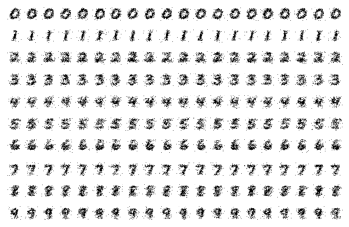

In [164]:
def P10(num_examples):
    
### STUDENT START ###

    BernNB = BernoulliNB(binarize=.1)
    model_fit = BernNB.fit(mini_train_data, mini_train_labels)

    # Probabilistic model
    pixel_probs = np.exp(model_fit.feature_log_prob_)

    adding_rows = 0

    for digit in range(10):
    
        grid = pixel_probs[digit] > np.random.rand(num_examples,28*28)
    
        for image in range(num_examples):
        
            adding_rows += 1
        
            plt.subplot(10, num_examples, adding_rows)
            plt.axis('off')
        
            plt.imshow(grid[image].reshape(28,28), cmap=plt.cm.gray_r)

### STUDENT END ###

P10(20)

ANSWER:Used probability of the pixel being a higher probability than the random number generator to create the data set.  Because the Naive Bayes assumes independence it is more difficult to make this data set.


(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [ ]:
#def P11(buckets, correct, total):
    
### STUDENT START ###


                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()